In [25]:
import pandas as pd

# Baca data CSV dengan delimiter tertentu
df = pd.read_csv('customer.csv', delimiter=';')

# Lakukan pembersihan dan pengolahan data sesuai kebutuhan
# Misalnya, mengatasi nilai yang hilang
df.fillna(0, inplace=True)

# Simpan kembali data yang telah dirapikan
df.to_csv('data_customer.csv', index=False)


In [26]:
import pandas as pd

# Baca data CSV dengan delimiter tertentu
df = pd.read_csv('product.csv', delimiter=';')

# Lakukan pembersihan dan pengolahan data sesuai kebutuhan
# Misalnya, mengatasi nilai yang hilang
df.fillna(0, inplace=True)

# Simpan kembali data yang telah dirapikan
df.to_csv('data_product.csv', index=False)

In [27]:
import pandas as pd

# Baca data CSV dengan delimiter tertentu
df = pd.read_csv('store.csv', delimiter=';')

# Lakukan pembersihan dan pengolahan data sesuai kebutuhan
# Misalnya, mengatasi nilai yang hilang
df.fillna(0, inplace=True)

# Simpan kembali data yang telah dirapikan
df.to_csv('data_store.csv', index=False)

In [29]:
import pandas as pd
# Baca data CSV dengan delimiter tertentu
df = pd.read_csv('transaction.csv', delimiter=';')

# Lakukan pembersihan dan pengolahan data sesuai kebutuhan
# Misalnya, mengatasi nilai yang hilang
df.fillna(0, inplace=True)

# Simpan kembali data yang telah dirapikan
df.to_csv('data_transaction.csv', index=False)

In [58]:
import pandas as pd
# Membaca data customer
customer_df = pd.read_csv('data_customer.csv')
# Membaca data store
store_df = pd.read_csv('data_store.csv')
# Membaca data product
product_df = pd.read_csv('data_product.csv')
# Membaca data transaction
transaction_df = pd.read_csv('data_transaction.csv')

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


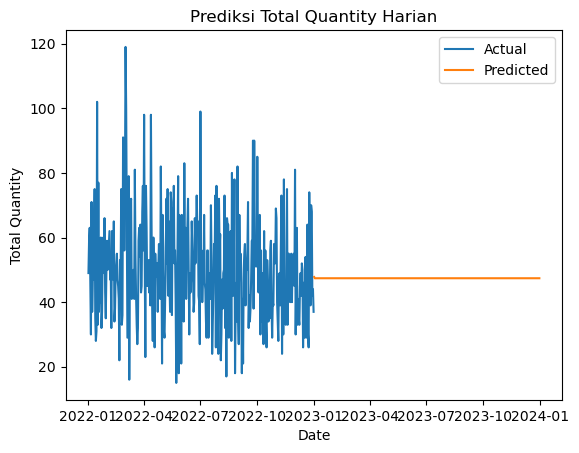

In [91]:
# Langkah 1: Impor pustaka yang diperlukan
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
# Langkah 2: Membaca dan mempersiapkan data
# Membaca data customer
customer_data = pd.read_csv('data_customer.csv')
# Membaca data store
store_data = pd.read_csv('data_store.csv', delimiter=';')  # Sesuaikan delimiter jika perlu
# Membaca data product
product_data = pd.read_csv('data_product.csv')
# Membaca data transaction
transaction_data = pd.read_csv('data_transaction.csv')

# Langkah 3: Data Cleansing
# Mengubah kolom Date menjadi tipe data datetime
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'], format='%d/%m/%Y')
# Langkah 4: Menggabungkan data
# Gabungkan data transaksi dengan data produk
merged_data = pd.merge(transaction_data, product_data, on='ProductID', how='inner')
# Langkah 5: Membuat data baru untuk regression
# untuk mendapatkan total kuantitas harian
daily_quantity = merged_data.groupby('Date')['Qty'].sum().reset_index()
daily_quantity.set_index('Date', inplace=True)
# Langkah 6: Menggunakan metode Time Series ARIMA
# Parameter ARIMA
p, d, q = 1, 1, 1  # Atur sesuai kebutuhan
# Inisialisasi dan melatih model ARIMA
model = ARIMA(daily_quantity, order=(p, d, q))
model_fit = model.fit()
# Melakukan prediksi untuk 365 hari ke depan
forecast_steps = 365
y_pred = model_fit.get_forecast(steps=forecast_steps)
# Visualisasi hasil prediksi
forecast_index = pd.date_range(start=daily_quantity.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecasted_data = y_pred.predicted_mean

plt.plot(daily_quantity.index, daily_quantity['Qty'], label='Actual')
plt.plot(forecast_index, forecasted_data, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.title('Prediksi Total Quantity Harian')
plt.show()

In [78]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Langkah 1: Data Cleansing


# Langkah 2: Menggabungkan Data
merged_data = pd.merge(transaction_data, customer_data, on='CustomerID')
merged_data = pd.merge(merged_data, store_data, on='StoreID')
merged_data = pd.merge(merged_data, product_data, on='ProductID')

# Langkah 3: Membuat Data Baru untuk Clustering
clustering_data = merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

# Langkah 4: Standarisasi Data (Opsional)
scaler = StandardScaler()
clustering_data[['TransactionID', 'Qty', 'TotalAmount']] = scaler.fit_transform(clustering_data
                                                                                [['TransactionID', 'Qty', 'TotalAmount']])

# Langkah 5: Penerapan Metode Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data[['TransactionID', 'Qty', 'TotalAmount']])

# Melihat hasil clustering
print(clustering_data.to_string())

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


     CustomerID  TransactionID       Qty  TotalAmount  Cluster
0             1       1.779816  1.496527     2.094768        0
1             2       0.545884  1.261093     0.239269        0
2             3       1.162850  1.182615     0.672218        0
3             4      -0.379565  0.397833    -0.482047        1
4             5      -1.305014 -1.093251    -0.754347        2
5             6      -0.379565  0.240877     0.775837        1
6             7       1.779816  1.261093     1.094726        0
7             8       0.854367  0.476311     1.442532        0
8             9      -0.379565  0.240877    -0.106931        1
9            10       0.854367  0.711746     0.927651        0
10           11      -1.305014 -1.014773    -0.925439        2
11           12       1.471333  1.575005     1.767043        0
12           13       2.396781  2.124352     2.461852        0
13           14       0.237401 -0.465426     0.289070        1
14           15       0.237401  0.240877     0.355739  